In [5]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()  # noqa
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import CountVectorizer
from python.cogtext.datasets.pubmed import PubMedDataLoader

In [2]:
# load weights, clusters and metadata (takes <20sec)

clusters = pd.read_csv('models/cogtext/abstracts_clusters.csv.gz', index_col=0)
weights = np.load('models/cogtext/abstracts_weights.npz')['arr_0']
clusters['weights'] = list(weights)

pubmed = PubMedDataLoader(preprocessed=False, drop_low_occurred_labels=True).load()
pubmed = pubmed.merge(clusters, on='pmid', how='left')

In [21]:
label_embeddings = pubmed.groupby('label')['weights'].apply(np.mean)
label_embeddings = pd.DataFrame(np.stack(label_embeddings), index=label_embeddings.index)

labels_corr = label_embeddings.T.corr(cosine)

label_categories = labels_corr.index.to_series().apply(
  lambda x: pubmed.query('label == @x')['category'].iloc[0])

/usr/local/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


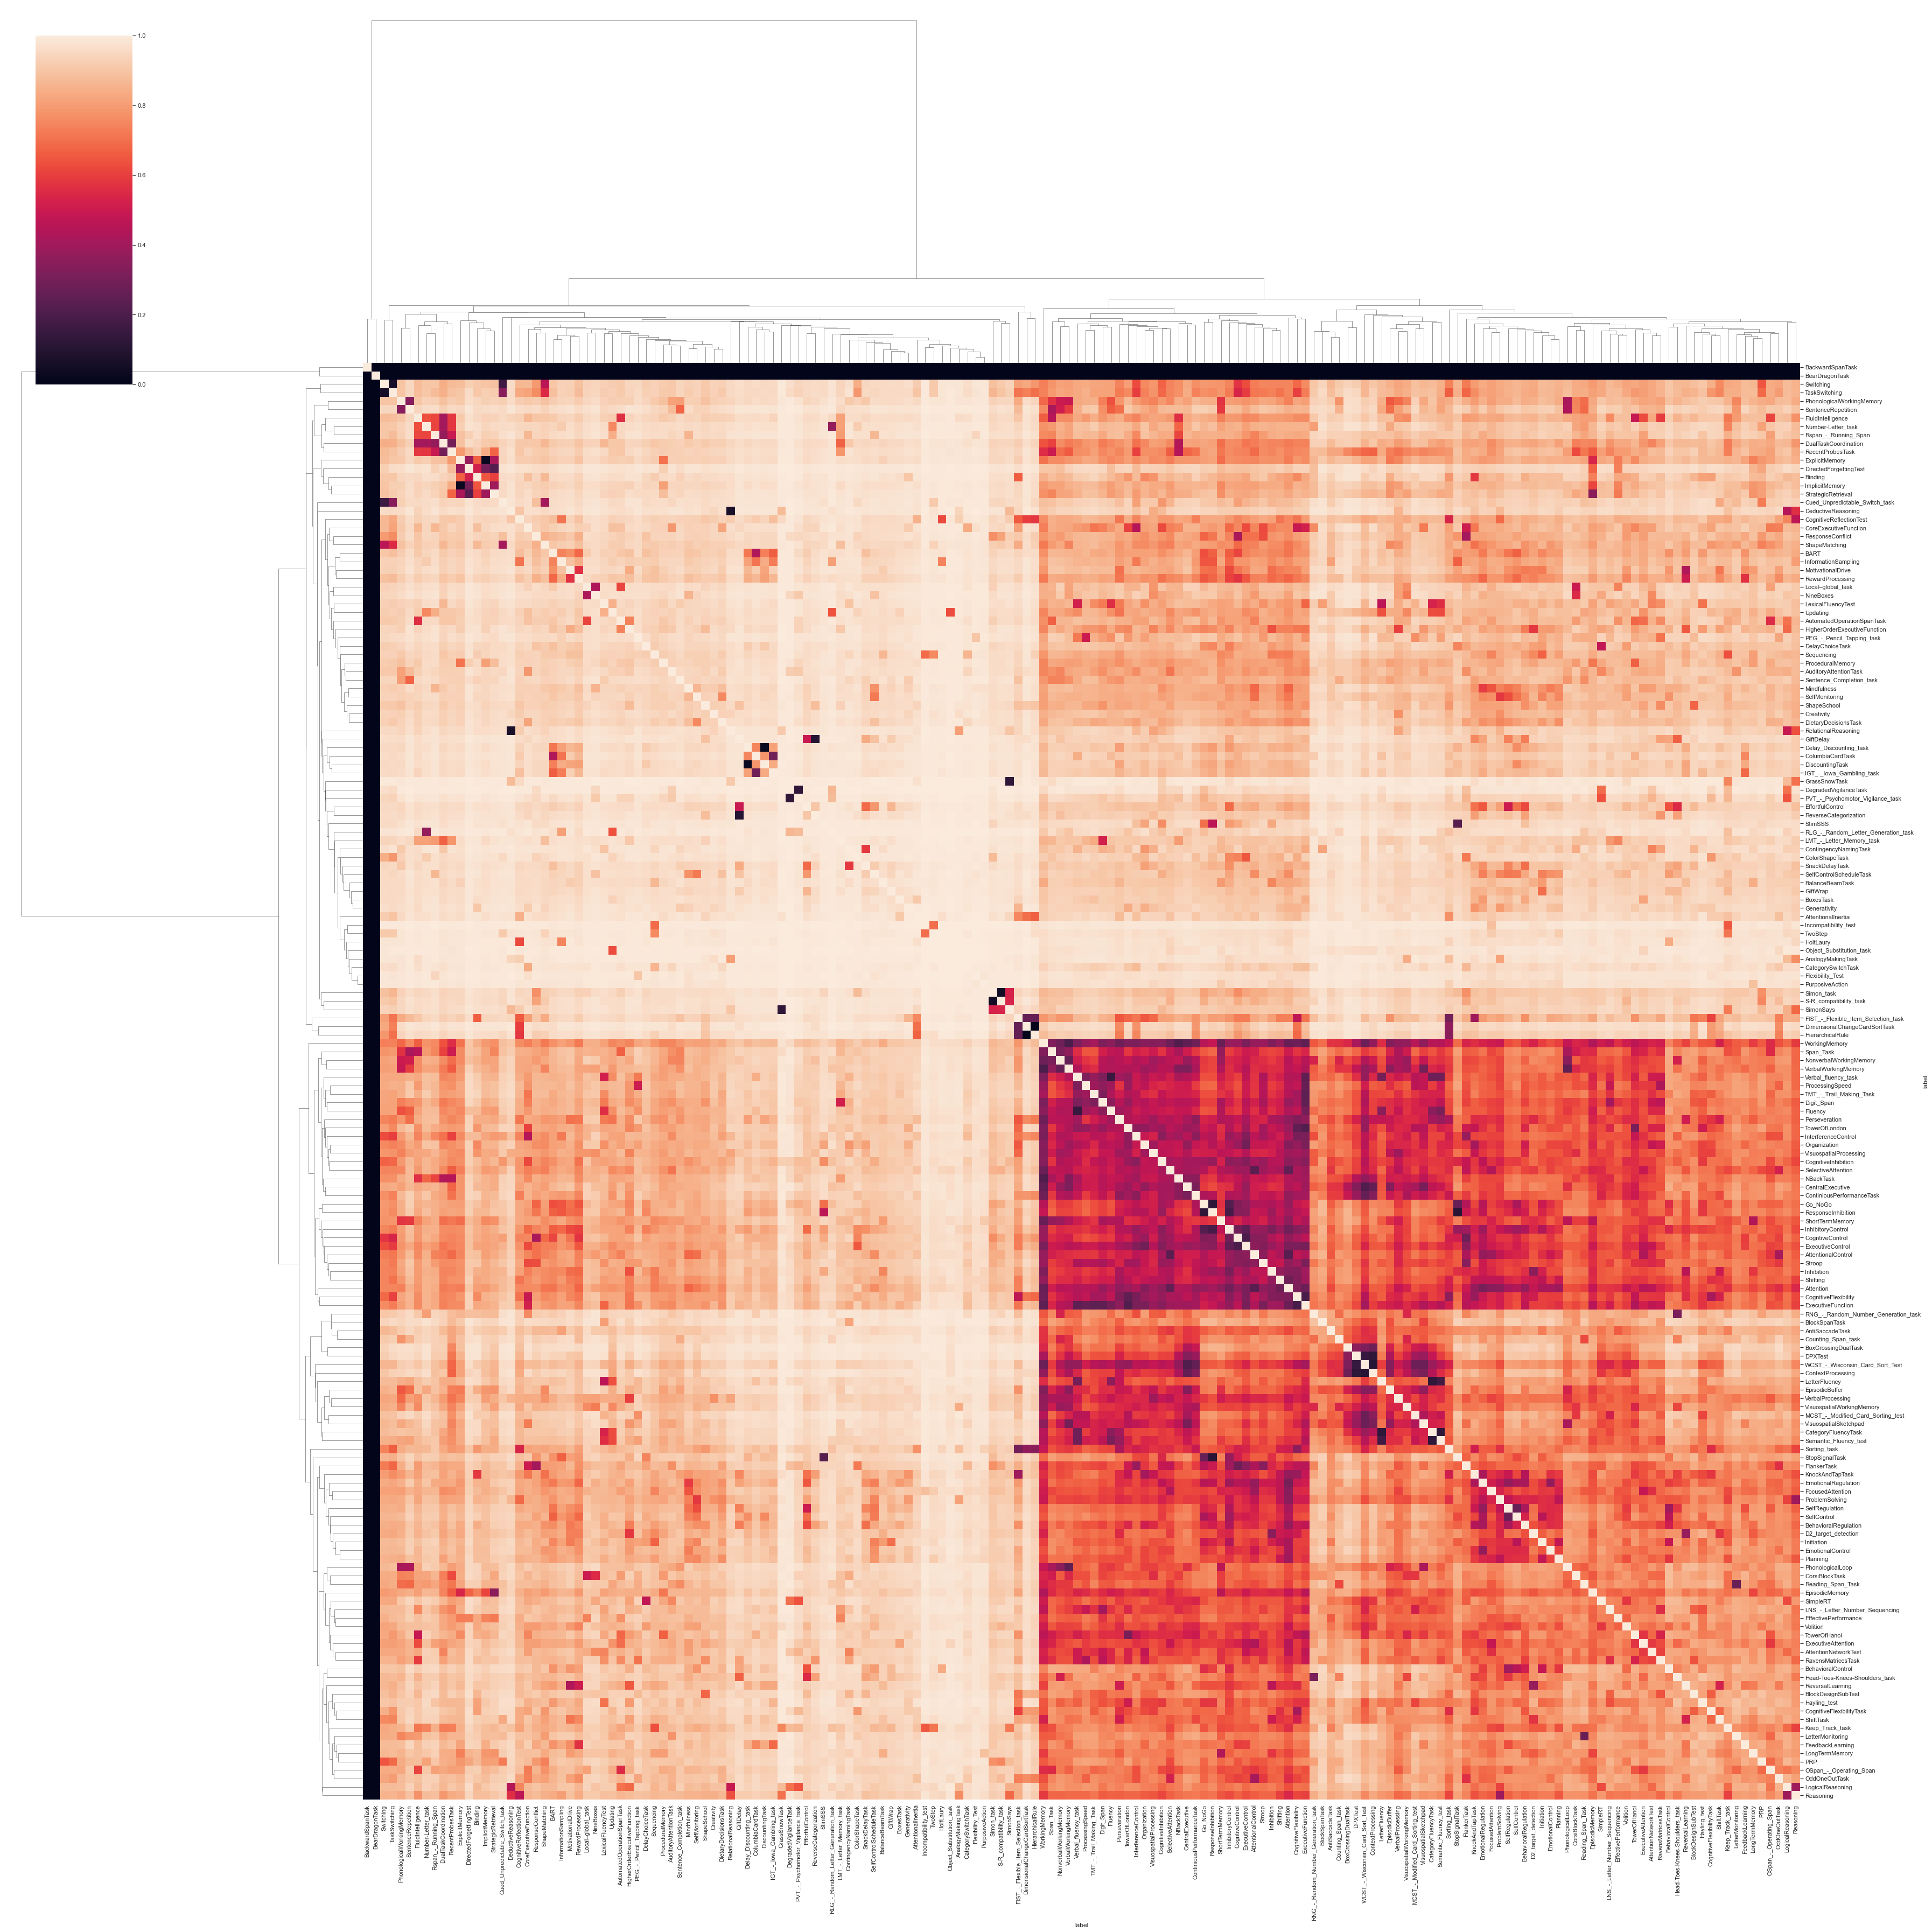

In [6]:
sns.clustermap(labels_corr, figsize=(50, 50))

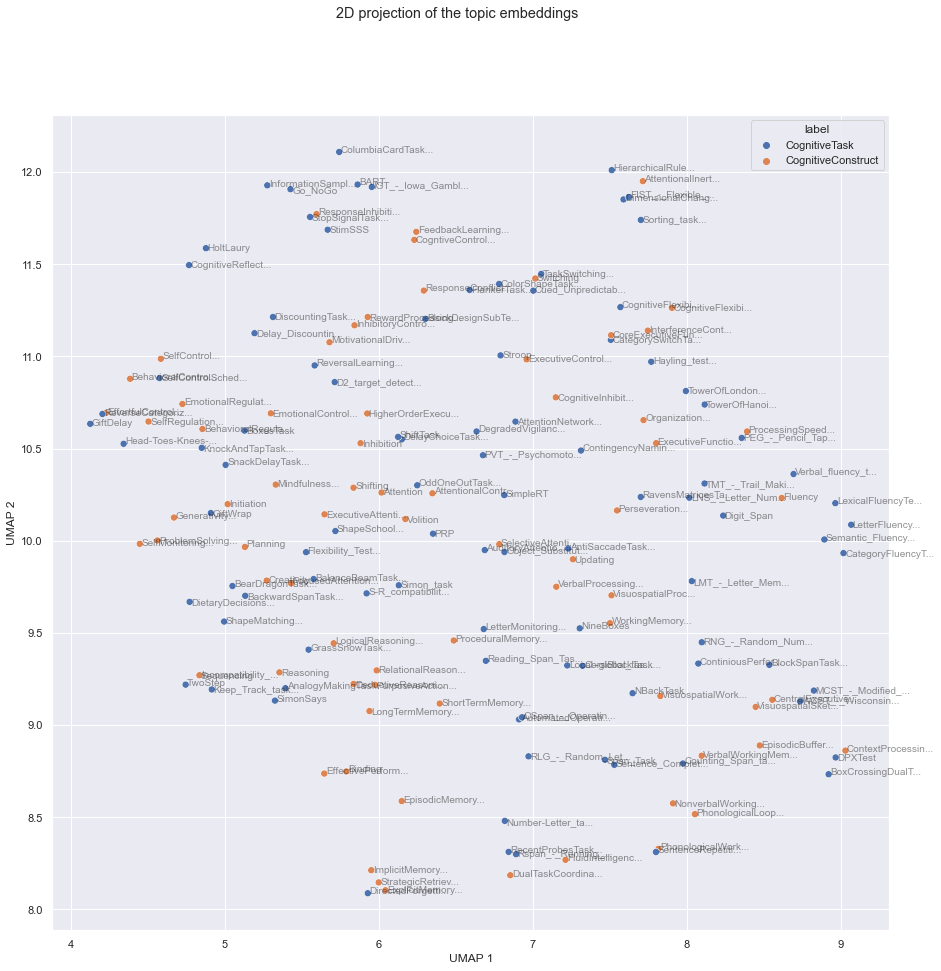

In [23]:
fig, ax = plt.subplots(1,1, figsize=(15,15))

# projections = PCA(n_components=2, random_state=0).fit_transform(label_embeddings)
projections = UMAP(n_components=2, random_state=0).fit_transform(label_embeddings)

projections = pd.DataFrame(projections, index=label_embeddings.index)

sns.scatterplot(data=projections, x=0, y=1, ax=ax, s=50, hue=label_categories)

for (lbl, x, y) in projections.itertuples():
  lbl = f'{lbl[:16]}...' if len(lbl)>10 else lbl
  ax.text(x+0.01, y-np.random.random()*.02, f'{lbl}', alpha=0.5, fontsize=10)

ax.set(xlabel='UMAP 1', ylabel='UMAP 2')
plt.suptitle('2D projection of the topic embeddings')
plt.show()

In [24]:
%reload_ext watermark
%watermark
%watermark -iv -p scipy,umap,pytorch,tensorflow,python.cogtext,scikit-learn

Last updated: 2021-12-05T23:56:55.451310+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.28.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

scipy         : 1.7.2
umap          : 0.5.2
pytorch       : not installed
tensorflow    : 2.7.0
python.cogtext: 0.1.2021120523
scikit-learn  : 0.0

pandas    : 1.3.4
numpy     : 1.20.3
seaborn   : 0.11.2
matplotlib: 3.4.3
sys       : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:19) 
[Clang 11.1.0 ]

